In [4]:
#pip install ml_metrics

In [6]:
import pandas as pd
import matplotlib
from matplotlib import pyplot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sa
import sklearn.metrics 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from pandas.plotting import autocorrelation_plot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
%matplotlib inline
import numpy as np
import ml_metrics as metrics
#через pip install ml_metrics - не вдається завантажити

ModuleNotFoundError: No module named 'ml_metrics'

In [7]:
series = pd.read_csv('AirPassengers.csv', header=0, index_col=0)
series.tail()

,passengers
month,
1960-08,606
1960-09,508
1960-10,461
1960-11,390
1960-12,432


In [8]:
series.info()


<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [9]:
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: 0.8153688792060497
p-value: 0.991880243437641
Critial Values:
   1%, -3.4816817173418295
Critial Values:
   5%, -2.8840418343195267
Critial Values:
   10%, -2.578770059171598


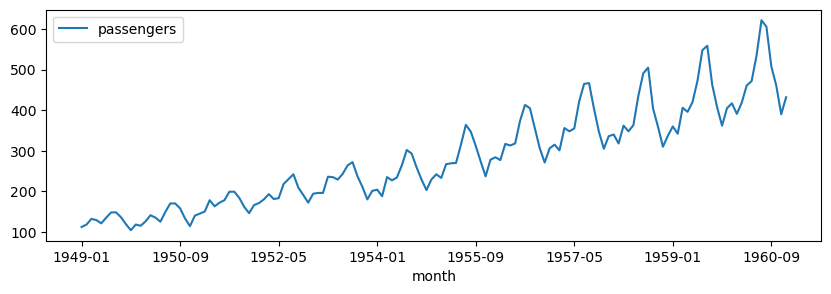

In [10]:
matplotlib.rcParams['figure.figsize']=[10,3]
series.plot()
pyplot.show()

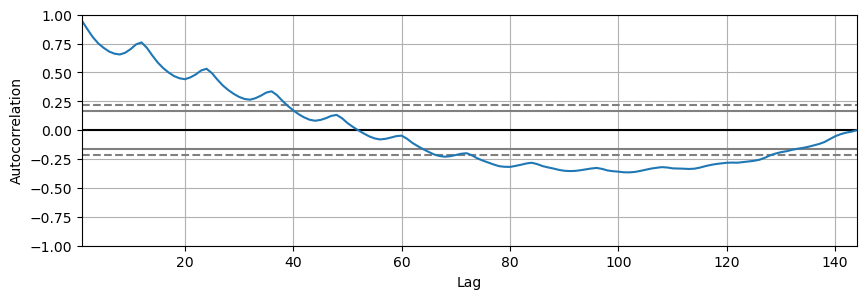

In [11]:
autocorrelation_plot(series)
pyplot.show()

In [12]:
acf.value=acf(series.passengers)
pacf.value=acf(series.passengers,nlags=3)

In [13]:
acf.value

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

In [14]:
pacf.value

array([1.        , 0.94804734, 0.87557484, 0.80668116])

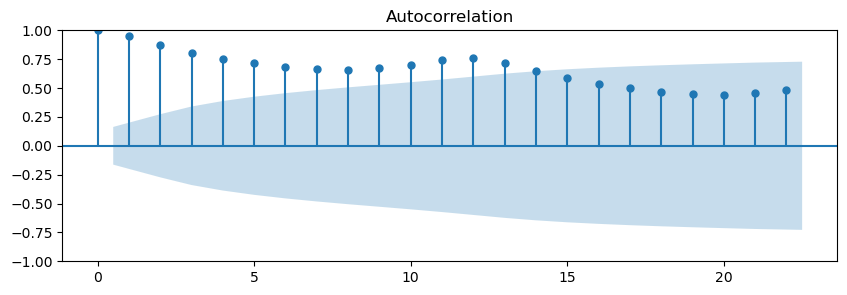

In [15]:
matplotlib.rcParams['figure.figsize']=[10,3]
plot_acf(series.passengers)
pyplot.show()

C:\Users\38098\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


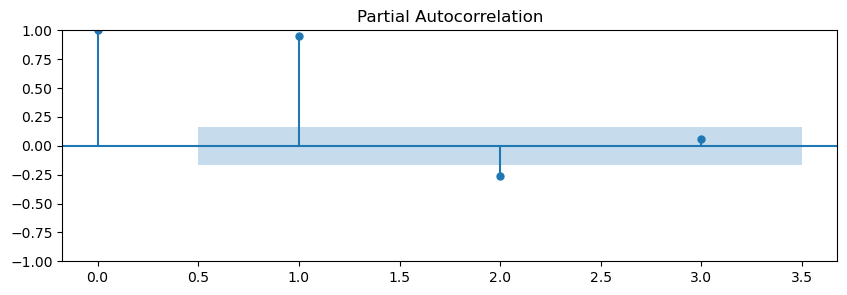

In [16]:
plot_pacf(series.passengers, lags =3)
pyplot.show()

In [17]:
src_data_model = series.passengers[:120]
model = sa.tsa.ARIMA(src_data_model).fit()
model.summary()

C:\Users\38098\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\38098\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\38098\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             passengers   No. Observations:                  120
Model:                          ARIMA   Log Likelihood                -716.163
Date:                Sat, 13 May 2023   AIC                           1436.325
Time:                        20:02:30   BIC                           1441.900
Sample:                    01-01-1949   HQIC                          1438.589
                         - 12-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        245.9083      9.695     25.364      0.000     226.906     264.911
sigma2      8932.0414   1438.175      6.211      0.000    6113.270    1.18e+04
===================================================================================
Ljung-Box (L1) (Q):                 109.17   Jarque-Bera (JB):                 7.49
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               1.48   Skew:                             0.58
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Test MSE: 2264.640


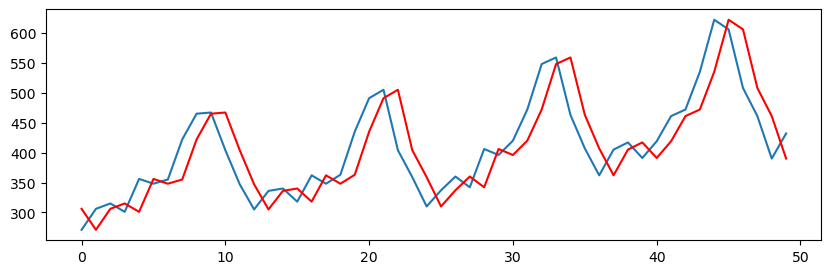

In [18]:
series = read_csv('AirPassengers.csv', header=0, index_col=0)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
X = dataframe.values
train, test = X[1:len(X)-50], X[len(X)-50:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
def model_persistence(x):
 return x

predictions = list()
for x in test_X:
 yhat = model_persistence(x)
 predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [19]:
series2 = pd.read_csv('temperature.csv',header=0, index_col=0)
series2.head()

,temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [20]:
series2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0+ KB


Test MSE: 5.668


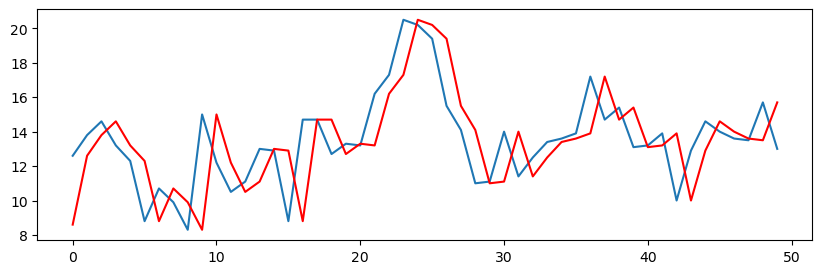

In [21]:
series = read_csv('temperature.csv', header=0, index_col=0)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
X = dataframe.values
train, test = X[1:len(X)-50], X[len(X)-50:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
def model_persistence(x):
 return x

predictions = list()
for x in test_X:
 yhat = model_persistence(x)
 predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()